# Sales Prediction

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.DataFrame(pd.read_csv("C:/Users/Computer Care/Downloads/advertising.csv"))
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#data cleaning
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

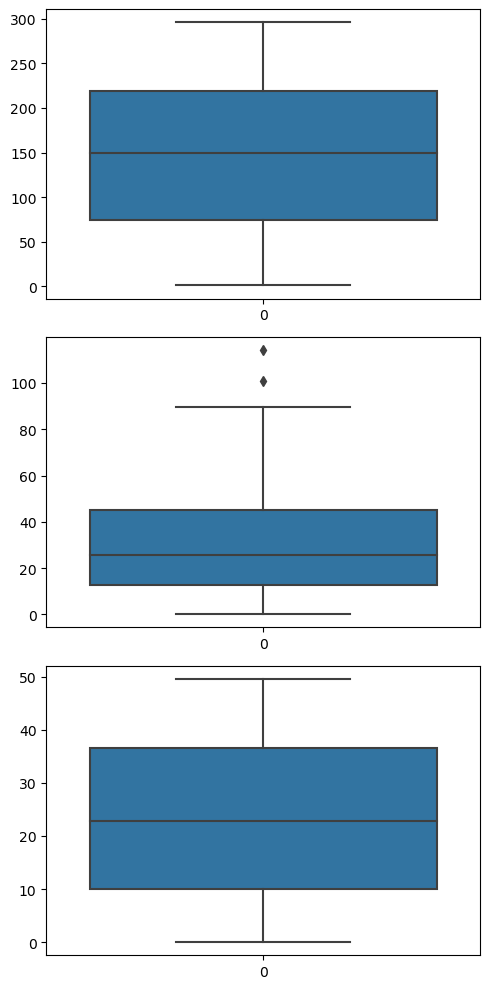

In [6]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,10))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

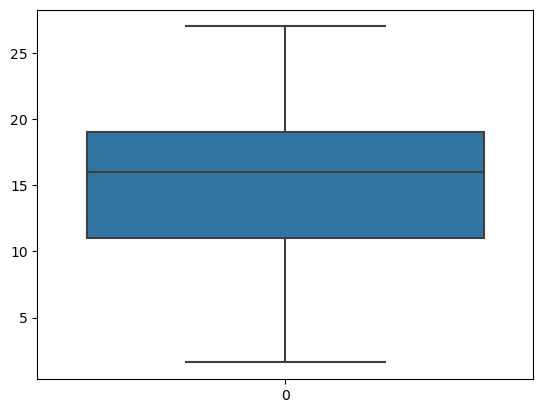

In [7]:
#Exploratory Data Analysis
sns.boxplot(df['Sales'])
plt.show()

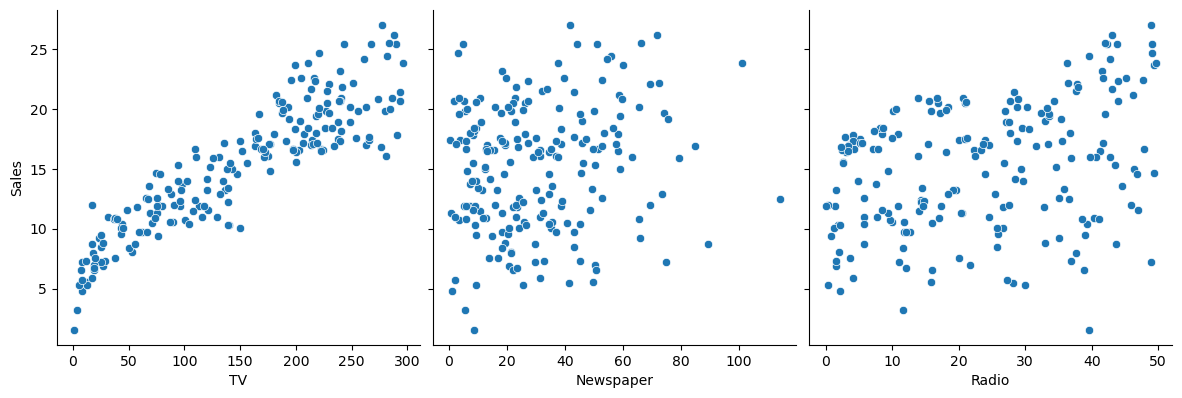

In [8]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

<Axes: xlabel='TV', ylabel='Density'>

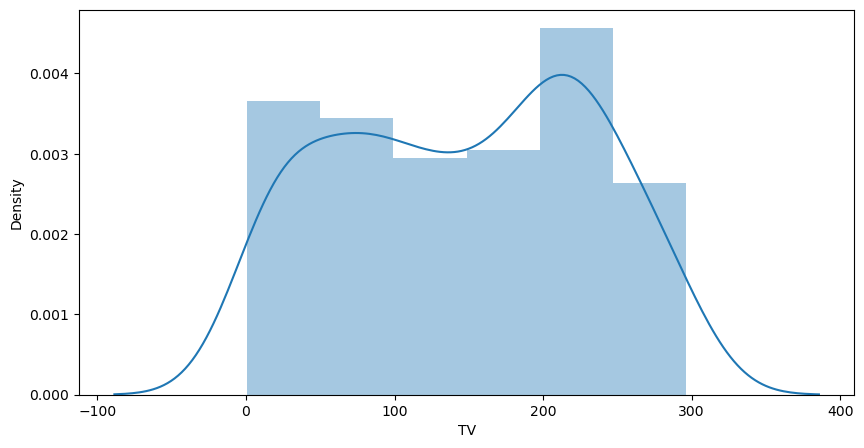

In [9]:
plt.figure(figsize=(10,5))
sns.distplot(df['TV'])

<Axes: xlabel='Radio', ylabel='Density'>

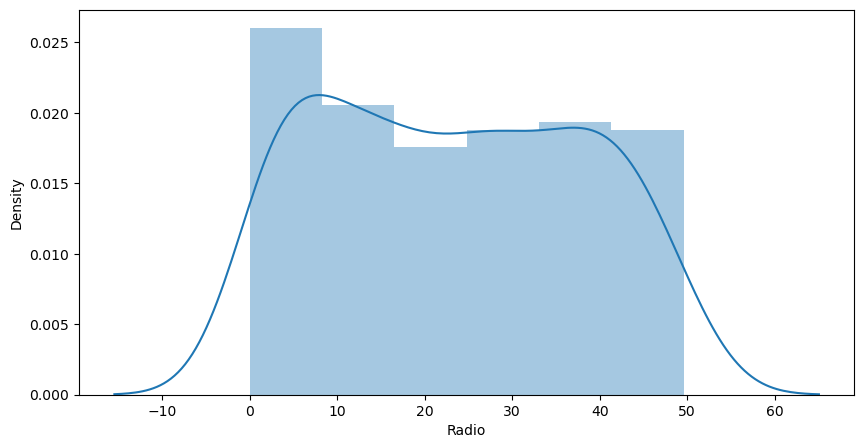

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(df['Radio'])

<Axes: xlabel='Newspaper', ylabel='Density'>

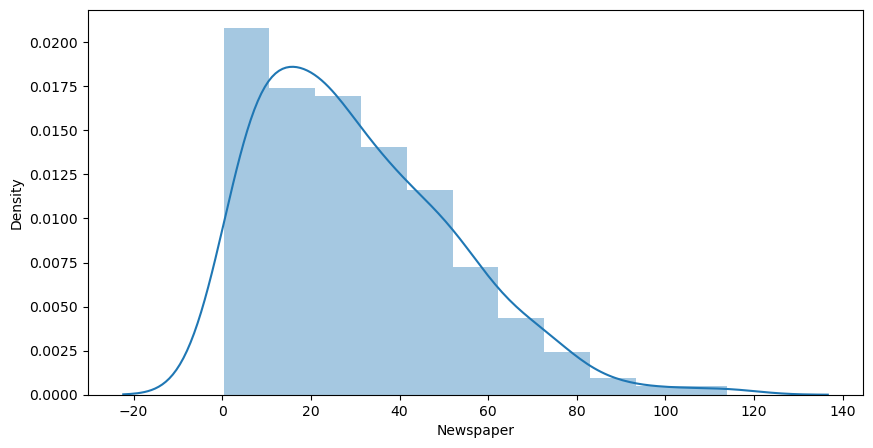

In [11]:
plt.figure(figsize=(10,5))
sns.distplot(df['Newspaper'])

<Axes: xlabel='Sales', ylabel='Density'>

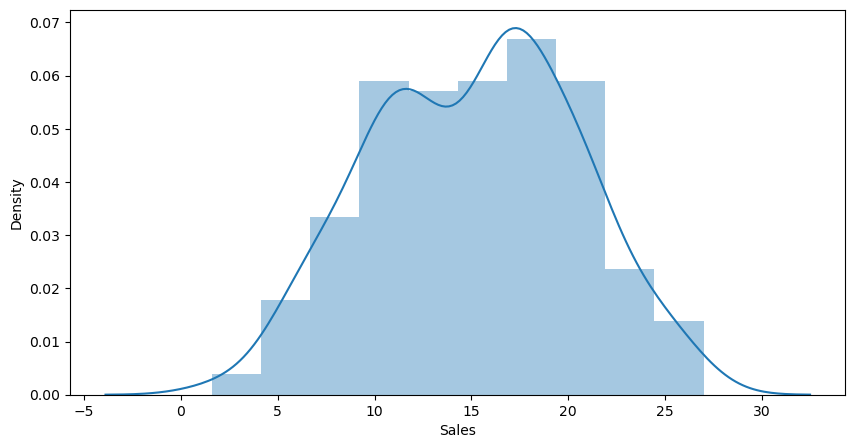

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(df['Sales'])

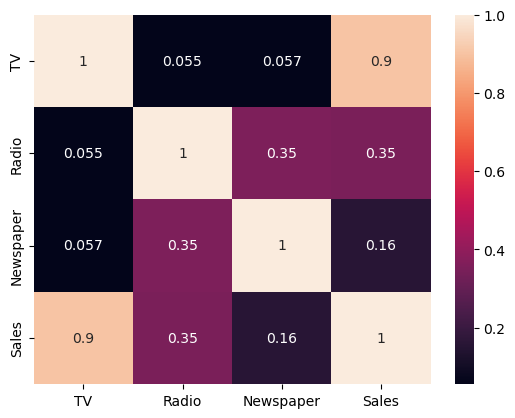

In [13]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [14]:
df.std()

TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.283892
dtype: float64

In [15]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [17]:
#Performing Simple Linear Regression
X = df['TV']
y = df['Sales']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [20]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [21]:
#Building linear Model
import statsmodels.api as sm

In [22]:
X_train_sm = sm.add_constant(X_train)

In [23]:
lr = sm.OLS(y_train,X_train_sm).fit()

In [24]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [26]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 17 Aug 2023   Prob (F-statistic):           1.52e-52
Time:                        10:13:27   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

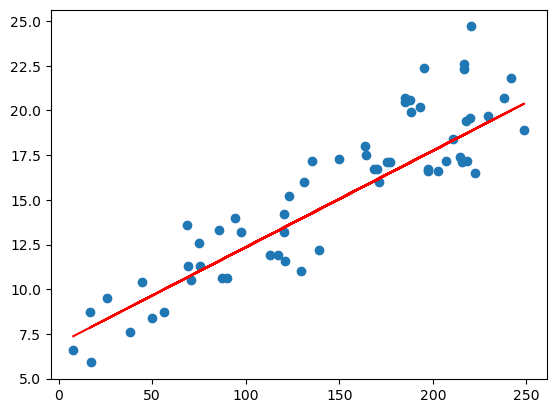

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [28]:
#Model Evaluation
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

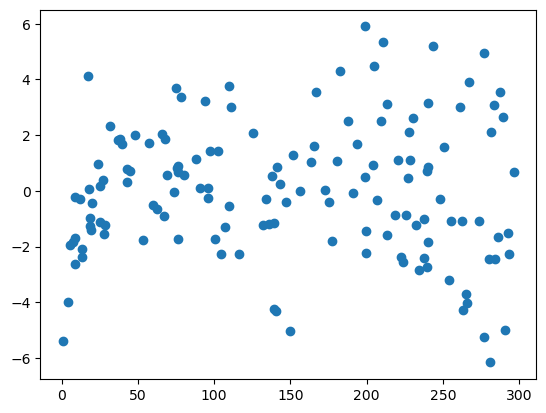

In [29]:
plt.scatter(X_train,res)
plt.show()

In [30]:
#Predication on Test set
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [31]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [34]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245659